In [130]:
import cv2
import os
import pickle
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [131]:
dir = r'./Data'
categories = ['Cat', 'Dog']
size = 100
data=[]
for category in categories:
    path = os.path.join(dir, category)
    label = categories.index(category)
    
    for img in os.listdir(path):
        imgpath = os.path.join(path, img)
        pet_img = cv2.imread(imgpath, 0)
        try:
            pet_img = cv2.resize(pet_img, (size, size))
            image = np.array(pet_img).flatten()
            data.append([image, label])
        except:
            pass
        

In [132]:
pick_in = open('data1.pickle', 'wb')
pickle.dump(data, pick_in)
pick_in.close()

In [133]:
pick_in = open('data1.pickle', 'rb')
pickle.load(pick_in)
pick_in.close()

In [134]:
random.shuffle(data)
features = []
labels = []

for feature, label in data:
    features.append(feature)
    labels.append(label)

In [135]:
xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size=0.98)

model = SVC(C=1, kernel='poly', gamma='auto')
model.fit(xtrain, ytrain)

SVC(C=1, gamma='auto', kernel='poly')

In [136]:
pick = open('model.sav', 'wb')
pickle.dump(model, pick)
pick.close()

In [137]:
pick = open('model.sav', 'rb')
model = pickle.load(pick)
pick.close()

Accuracy: 0.5925925925925926
 Prediction: Cat


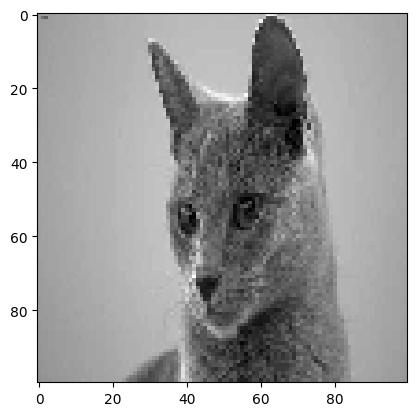

In [138]:
predict = model.predict(xtest)
accuracy = model.score(xtest, ytest)

print(f'Accuracy: {accuracy}\n Prediction: {categories[predict[0]]}')

mypet = xtest[0].reshape(size, size)
plt.imshow(mypet, cmap='gray')
plt.show()